In [1]:
import sys, os, pickle
sys.path.append('/scratch/oem214/vanilla-rtrl/')
from cluster import *
from continual_learning import *
from core import *
from dynamics import *
from functions import *
from gen_data import * 
from learning_algorithms import *
from optimizers import *
from plotting import *
from wrappers import *
import matplotlib.pyplot as plt

In [2]:
### --- SET UP ALL CONFIGS --- ###
from itertools import product
n_seeds = 3
macro_configs = config_generator(learn_alg=['DNI', 'RFLO'])
micro_configs = tuple(product(macro_configs, list(range(n_seeds))))

In [5]:
root_name = 'new_align_alg'
file_names = []
for params, i_seed in micro_configs:
    
    np.random.seed(i_seed)

    task = Flip_Flop_Task(3, 0.05, input_magnitudes=None)
    N_train = 150000
    N_test = 10000
    checkpoint_interval = 500
    sigma = 0
    data = task.gen_data(N_train, N_test)

    n_in = task.n_in
    n_hidden = 32
    n_out = task.n_out

    W_in  = np.random.normal(0, np.sqrt(1/(n_in)), (n_hidden, n_in))
    W_rec = np.random.normal(0, np.sqrt(1/n_hidden), (n_hidden, n_hidden))
    W_out = np.random.normal(0, np.sqrt(1/(n_hidden)), (n_out, n_hidden))

    b_rec = np.zeros(n_hidden)
    b_out = np.zeros(n_out)

    alpha = 1
    sigma = 0
    
    rnn = RNN(W_in, W_rec, W_out, b_rec, b_out,
              activation=tanh,
              alpha=alpha,
              output=identity,
              loss=mean_squared_error)

    #learn_alg = RTRL(rnn, L2_reg=0.0001, L1_reg=0.0001)
    #learn_alg = Efficient_BPTT(rnn, T_truncation=6, L2_reg=0.0001, L1_reg=0.0001)
    if params['learn_alg'] == 'RFLO':
        learn_alg = RFLO(rnn, alpha=1)
    if params['learn_alg'] == 'DNI':
        sg_optimizer = Stochastic_Gradient_Descent(lr=0.003)
        learn_alg = DNI(rnn, sg_optimizer)
    #learn_alg = REINFORCE(rnn, sigma=params['sigma'], decay=1, loss_decay=0.01)
    #optimizer = SGD_Momentum(lr=0.001, mu=0.6)
    optimizer = SGD_Momentum(lr=0.0003, mu=0.6)

    monitors = []

    sim = Simulation(rnn)
    sim.run(data, learn_alg=learn_alg, optimizer=optimizer,
            sigma=sigma,
            monitors=monitors,
            verbose=False,
            report_accuracy=False,
            report_loss=True,
            checkpoint_interval=checkpoint_interval)
    
    file_name = root_name + '_seed={}'.format(i_seed)
    for key in params.keys():
        file_name += '_{}={}'.format(key, str(params[key]).replace('.', ','))
        
    file_names.append(file_name)
    
    print('finish simulation: {}'.format(params['learn_alg']))
    if np.isnan(rnn.W_rec[0, 0]):
        print('MISTAKES WERE MADE')
        break
    
    
    ### --- SAVE RUN --- ###
    with open(os.path.join('saved_runs/', file_name), 'wb') as f:
        saved_run = {'sim': sim, 'task': task}
        pickle.dump(saved_run, f)
    

    ### --- Interpolation --- ###
    
#    sim = linearly_interpolate_checkpoints(sim, sim.checkpoints[0],
#                                           sim.checkpoints[N_train - checkpoint_interval],
#                                           checkpoint_interval)
#    
#    file_name += '_interp'
#        
#    file_names.append(file_name)
#    
#    ### --- SAVE RUN --- ###
#    with open(os.path.join('saved_runs/', file_name), 'wb') as f:
#        saved_run = {'sim': sim, 'task': task}
#        pickle.dump(saved_run, f)

finish simulation: DNI
finish simulation: DNI
finish simulation: DNI
finish simulation: RFLO
finish simulation: RFLO
finish simulation: RFLO


In [8]:
len(sim.checkpoints)

301

In [9]:
root_name = 'new_align_alg'
cross_topological_analysis(root_name, ppn=16, FP_find_FPs=True, find_KE_criterion=0.01,
                           test_save_data=False, test_N=1200,
                           n_checkpoints_per_job_=10,
                           compare_aligned_graph=True, compare_node_diff=True,
                           compare_node_drift=True, compare_SVCCA=False, compare_align_checkpoints=True,
                           compare_CKA=False,
                           compare_PC1=False, compare_PC2=False, compare_PC3=False)

rm: cannot remove '/scratch/oem214/learning-dynamics/results/analyze_new_align_alg_seed=0_learn_alg=DNI/result_*': No such file or directory
sending incremental file list
vanilla-rtrl/
vanilla-rtrl/.DS_Store
vanilla-rtrl/.gitignore
vanilla-rtrl/README.md
vanilla-rtrl/__init__.py
vanilla-rtrl/analyze_main.py
vanilla-rtrl/compare_main.py
vanilla-rtrl/cross_compare_main.py
vanilla-rtrl/jupyter_notebook.py
vanilla-rtrl/test.py
vanilla-rtrl/test_2.py
vanilla-rtrl/.idea/
vanilla-rtrl/.idea/misc.xml
vanilla-rtrl/.idea/modules.xml
vanilla-rtrl/.idea/vanilla-rtrl.iml
vanilla-rtrl/.idea/vcs.xml
vanilla-rtrl/.idea/workspace.xml
vanilla-rtrl/.idea/codeStyles/
vanilla-rtrl/.idea/codeStyles/codeStyleConfig.xml
vanilla-rtrl/.ipynb_checkpoints/
vanilla-rtrl/.ipynb_checkpoints/main-checkpoint.ipynb
vanilla-rtrl/.ipynb_checkpoints/test_interface-checkpoint.ipynb
vanilla-rtrl/__pycache__/
vanilla-rtrl/__pycache__/analysis.cpython-36.pyc
vanilla-rtrl/__pycache__/analysis_funcs.cpython-36.pyc
vanilla-rtrl/

vanilla-rtrl/gen_data/__pycache__/Task.cpython-38.pyc
vanilla-rtrl/gen_data/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/gen_data/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/gen_data/__pycache__/gen_data_utils.cpython-37.pyc
vanilla-rtrl/gen_data/__pycache__/gen_data_utils.cpython-38.pyc
vanilla-rtrl/learning_algorithms/
vanilla-rtrl/learning_algorithms/DNI.py
vanilla-rtrl/learning_algorithms/Efficient_BPTT.py
vanilla-rtrl/learning_algorithms/Future_BPTT.py
vanilla-rtrl/learning_algorithms/KF_RTRL.py
vanilla-rtrl/learning_algorithms/KeRNL.py
vanilla-rtrl/learning_algorithms/Learning_Algorithm.py
vanilla-rtrl/learning_algorithms/List_of_Gradients.py
vanilla-rtrl/learning_algorithms/Miconi_REINFORCE.py
vanilla-rtrl/learning_algorithms/Only_Output_Weights.py
vanilla-rtrl/learning_algorithms/REINFORCE.py
vanilla-rtrl/learning_algorithms/RFLO.py
vanilla-rtrl/learning_algorithms/RTRL.py
vanilla-rtrl/learning_algorithms/Random_Noise_Gradients.py
vanilla-rtrl/learning_algorithms/Rever

rm: cannot remove '/scratch/oem214/learning-dynamics/results/analyze_new_align_alg_seed=0_learn_alg=RFLO/result_*': No such file or directory
sending incremental file list
vanilla-rtrl/
vanilla-rtrl/.DS_Store
vanilla-rtrl/.gitignore
vanilla-rtrl/README.md
vanilla-rtrl/__init__.py
vanilla-rtrl/analyze_main.py
vanilla-rtrl/compare_main.py
vanilla-rtrl/cross_compare_main.py
vanilla-rtrl/jupyter_notebook.py
vanilla-rtrl/test.py
vanilla-rtrl/test_2.py
vanilla-rtrl/.idea/
vanilla-rtrl/.idea/misc.xml
vanilla-rtrl/.idea/modules.xml
vanilla-rtrl/.idea/vanilla-rtrl.iml
vanilla-rtrl/.idea/vcs.xml
vanilla-rtrl/.idea/workspace.xml
vanilla-rtrl/.idea/codeStyles/
vanilla-rtrl/.idea/codeStyles/codeStyleConfig.xml
vanilla-rtrl/.ipynb_checkpoints/
vanilla-rtrl/.ipynb_checkpoints/main-checkpoint.ipynb
vanilla-rtrl/.ipynb_checkpoints/test_interface-checkpoint.ipynb
vanilla-rtrl/__pycache__/
vanilla-rtrl/__pycache__/analysis.cpython-36.pyc
vanilla-rtrl/__pycache__/analysis_funcs.cpython-36.pyc
vanilla-rtrl

vanilla-rtrl/gen_data/__pycache__/Task.cpython-38.pyc
vanilla-rtrl/gen_data/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/gen_data/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/gen_data/__pycache__/gen_data_utils.cpython-37.pyc
vanilla-rtrl/gen_data/__pycache__/gen_data_utils.cpython-38.pyc
vanilla-rtrl/learning_algorithms/
vanilla-rtrl/learning_algorithms/DNI.py
vanilla-rtrl/learning_algorithms/Efficient_BPTT.py
vanilla-rtrl/learning_algorithms/Future_BPTT.py
vanilla-rtrl/learning_algorithms/KF_RTRL.py
vanilla-rtrl/learning_algorithms/KeRNL.py
vanilla-rtrl/learning_algorithms/Learning_Algorithm.py
vanilla-rtrl/learning_algorithms/List_of_Gradients.py
vanilla-rtrl/learning_algorithms/Miconi_REINFORCE.py
vanilla-rtrl/learning_algorithms/Only_Output_Weights.py
vanilla-rtrl/learning_algorithms/REINFORCE.py
vanilla-rtrl/learning_algorithms/RFLO.py
vanilla-rtrl/learning_algorithms/RTRL.py
vanilla-rtrl/learning_algorithms/Random_Noise_Gradients.py
vanilla-rtrl/learning_algorithms/Rever

rm: cannot remove '/scratch/oem214/learning-dynamics/results/analyze_new_align_alg_seed=1_learn_alg=DNI/result_*': No such file or directory
sending incremental file list
vanilla-rtrl/
vanilla-rtrl/.DS_Store
vanilla-rtrl/.gitignore
vanilla-rtrl/README.md
vanilla-rtrl/__init__.py
vanilla-rtrl/analyze_main.py
vanilla-rtrl/compare_main.py
vanilla-rtrl/cross_compare_main.py
vanilla-rtrl/jupyter_notebook.py
vanilla-rtrl/test.py
vanilla-rtrl/test_2.py
vanilla-rtrl/.idea/
vanilla-rtrl/.idea/misc.xml
vanilla-rtrl/.idea/modules.xml
vanilla-rtrl/.idea/vanilla-rtrl.iml
vanilla-rtrl/.idea/vcs.xml
vanilla-rtrl/.idea/workspace.xml
vanilla-rtrl/.idea/codeStyles/
vanilla-rtrl/.idea/codeStyles/codeStyleConfig.xml
vanilla-rtrl/.ipynb_checkpoints/
vanilla-rtrl/.ipynb_checkpoints/main-checkpoint.ipynb
vanilla-rtrl/.ipynb_checkpoints/test_interface-checkpoint.ipynb
vanilla-rtrl/__pycache__/
vanilla-rtrl/__pycache__/analysis.cpython-36.pyc
vanilla-rtrl/__pycache__/analysis_funcs.cpython-36.pyc
vanilla-rtrl/

vanilla-rtrl/gen_data/__pycache__/Task.cpython-38.pyc
vanilla-rtrl/gen_data/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/gen_data/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/gen_data/__pycache__/gen_data_utils.cpython-37.pyc
vanilla-rtrl/gen_data/__pycache__/gen_data_utils.cpython-38.pyc
vanilla-rtrl/learning_algorithms/
vanilla-rtrl/learning_algorithms/DNI.py
vanilla-rtrl/learning_algorithms/Efficient_BPTT.py
vanilla-rtrl/learning_algorithms/Future_BPTT.py
vanilla-rtrl/learning_algorithms/KF_RTRL.py
vanilla-rtrl/learning_algorithms/KeRNL.py
vanilla-rtrl/learning_algorithms/Learning_Algorithm.py
vanilla-rtrl/learning_algorithms/List_of_Gradients.py
vanilla-rtrl/learning_algorithms/Miconi_REINFORCE.py
vanilla-rtrl/learning_algorithms/Only_Output_Weights.py
vanilla-rtrl/learning_algorithms/REINFORCE.py
vanilla-rtrl/learning_algorithms/RFLO.py
vanilla-rtrl/learning_algorithms/RTRL.py
vanilla-rtrl/learning_algorithms/Random_Noise_Gradients.py
vanilla-rtrl/learning_algorithms/Rever

rm: cannot remove '/scratch/oem214/learning-dynamics/results/analyze_new_align_alg_seed=1_learn_alg=RFLO/result_*': No such file or directory
sending incremental file list
vanilla-rtrl/
vanilla-rtrl/.DS_Store
vanilla-rtrl/.gitignore
vanilla-rtrl/README.md
vanilla-rtrl/__init__.py
vanilla-rtrl/analyze_main.py
vanilla-rtrl/compare_main.py
vanilla-rtrl/cross_compare_main.py
vanilla-rtrl/jupyter_notebook.py
vanilla-rtrl/test.py
vanilla-rtrl/test_2.py
vanilla-rtrl/.idea/
vanilla-rtrl/.idea/misc.xml
vanilla-rtrl/.idea/modules.xml
vanilla-rtrl/.idea/vanilla-rtrl.iml
vanilla-rtrl/.idea/vcs.xml
vanilla-rtrl/.idea/workspace.xml
vanilla-rtrl/.idea/codeStyles/
vanilla-rtrl/.idea/codeStyles/codeStyleConfig.xml
vanilla-rtrl/.ipynb_checkpoints/
vanilla-rtrl/.ipynb_checkpoints/main-checkpoint.ipynb
vanilla-rtrl/.ipynb_checkpoints/test_interface-checkpoint.ipynb
vanilla-rtrl/__pycache__/
vanilla-rtrl/__pycache__/analysis.cpython-36.pyc
vanilla-rtrl/__pycache__/analysis_funcs.cpython-36.pyc
vanilla-rtrl

vanilla-rtrl/gen_data/__pycache__/Task.cpython-38.pyc
vanilla-rtrl/gen_data/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/gen_data/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/gen_data/__pycache__/gen_data_utils.cpython-37.pyc
vanilla-rtrl/gen_data/__pycache__/gen_data_utils.cpython-38.pyc
vanilla-rtrl/learning_algorithms/
vanilla-rtrl/learning_algorithms/DNI.py
vanilla-rtrl/learning_algorithms/Efficient_BPTT.py
vanilla-rtrl/learning_algorithms/Future_BPTT.py
vanilla-rtrl/learning_algorithms/KF_RTRL.py
vanilla-rtrl/learning_algorithms/KeRNL.py
vanilla-rtrl/learning_algorithms/Learning_Algorithm.py
vanilla-rtrl/learning_algorithms/List_of_Gradients.py
vanilla-rtrl/learning_algorithms/Miconi_REINFORCE.py
vanilla-rtrl/learning_algorithms/Only_Output_Weights.py
vanilla-rtrl/learning_algorithms/REINFORCE.py
vanilla-rtrl/learning_algorithms/RFLO.py
vanilla-rtrl/learning_algorithms/RTRL.py
vanilla-rtrl/learning_algorithms/Random_Noise_Gradients.py
vanilla-rtrl/learning_algorithms/Rever

rm: cannot remove '/scratch/oem214/learning-dynamics/results/analyze_new_align_alg_seed=2_learn_alg=DNI/result_*': No such file or directory
sending incremental file list
vanilla-rtrl/
vanilla-rtrl/.DS_Store
vanilla-rtrl/.gitignore
vanilla-rtrl/README.md
vanilla-rtrl/__init__.py
vanilla-rtrl/analyze_main.py
vanilla-rtrl/compare_main.py
vanilla-rtrl/cross_compare_main.py
vanilla-rtrl/jupyter_notebook.py
vanilla-rtrl/test.py
vanilla-rtrl/test_2.py
vanilla-rtrl/.idea/
vanilla-rtrl/.idea/misc.xml
vanilla-rtrl/.idea/modules.xml
vanilla-rtrl/.idea/vanilla-rtrl.iml
vanilla-rtrl/.idea/vcs.xml
vanilla-rtrl/.idea/workspace.xml
vanilla-rtrl/.idea/codeStyles/
vanilla-rtrl/.idea/codeStyles/codeStyleConfig.xml
vanilla-rtrl/.ipynb_checkpoints/
vanilla-rtrl/.ipynb_checkpoints/main-checkpoint.ipynb
vanilla-rtrl/.ipynb_checkpoints/test_interface-checkpoint.ipynb
vanilla-rtrl/__pycache__/
vanilla-rtrl/__pycache__/analysis.cpython-36.pyc
vanilla-rtrl/__pycache__/analysis_funcs.cpython-36.pyc
vanilla-rtrl/

vanilla-rtrl/gen_data/__pycache__/Task.cpython-38.pyc
vanilla-rtrl/gen_data/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/gen_data/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/gen_data/__pycache__/gen_data_utils.cpython-37.pyc
vanilla-rtrl/gen_data/__pycache__/gen_data_utils.cpython-38.pyc
vanilla-rtrl/learning_algorithms/
vanilla-rtrl/learning_algorithms/DNI.py
vanilla-rtrl/learning_algorithms/Efficient_BPTT.py
vanilla-rtrl/learning_algorithms/Future_BPTT.py
vanilla-rtrl/learning_algorithms/KF_RTRL.py
vanilla-rtrl/learning_algorithms/KeRNL.py
vanilla-rtrl/learning_algorithms/Learning_Algorithm.py
vanilla-rtrl/learning_algorithms/List_of_Gradients.py
vanilla-rtrl/learning_algorithms/Miconi_REINFORCE.py
vanilla-rtrl/learning_algorithms/Only_Output_Weights.py
vanilla-rtrl/learning_algorithms/REINFORCE.py
vanilla-rtrl/learning_algorithms/RFLO.py
vanilla-rtrl/learning_algorithms/RTRL.py
vanilla-rtrl/learning_algorithms/Random_Noise_Gradients.py
vanilla-rtrl/learning_algorithms/Rever

sending incremental file list
vanilla-rtrl/
vanilla-rtrl/.DS_Store
vanilla-rtrl/.gitignore
vanilla-rtrl/README.md
vanilla-rtrl/__init__.py
vanilla-rtrl/analyze_main.py
vanilla-rtrl/compare_main.py
vanilla-rtrl/cross_compare_main.py
vanilla-rtrl/jupyter_notebook.py
vanilla-rtrl/test.py
vanilla-rtrl/test_2.py
vanilla-rtrl/.idea/
vanilla-rtrl/.idea/misc.xml
vanilla-rtrl/.idea/modules.xml
vanilla-rtrl/.idea/vanilla-rtrl.iml
vanilla-rtrl/.idea/vcs.xml
vanilla-rtrl/.idea/workspace.xml
vanilla-rtrl/.idea/codeStyles/
vanilla-rtrl/.idea/codeStyles/codeStyleConfig.xml
vanilla-rtrl/.ipynb_checkpoints/
vanilla-rtrl/.ipynb_checkpoints/main-checkpoint.ipynb
vanilla-rtrl/.ipynb_checkpoints/test_interface-checkpoint.ipynb
vanilla-rtrl/__pycache__/
vanilla-rtrl/__pycache__/analysis.cpython-36.pyc
vanilla-rtrl/__pycache__/analysis_funcs.cpython-36.pyc
vanilla-rtrl/__pycache__/analysis_funcs.cpython-37.pyc
vanilla-rtrl/__pycache__/continual_learning.cpython-37.pyc
vanilla-rtrl/__pycache__/distances.cpyth

vanilla-rtrl/gen_data/__pycache__/Task.cpython-38.pyc
vanilla-rtrl/gen_data/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/gen_data/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/gen_data/__pycache__/gen_data_utils.cpython-37.pyc
vanilla-rtrl/gen_data/__pycache__/gen_data_utils.cpython-38.pyc
vanilla-rtrl/learning_algorithms/
vanilla-rtrl/learning_algorithms/DNI.py
vanilla-rtrl/learning_algorithms/Efficient_BPTT.py
vanilla-rtrl/learning_algorithms/Future_BPTT.py
vanilla-rtrl/learning_algorithms/KF_RTRL.py
vanilla-rtrl/learning_algorithms/KeRNL.py
vanilla-rtrl/learning_algorithms/Learning_Algorithm.py
vanilla-rtrl/learning_algorithms/List_of_Gradients.py
vanilla-rtrl/learning_algorithms/Miconi_REINFORCE.py
vanilla-rtrl/learning_algorithms/Only_Output_Weights.py
vanilla-rtrl/learning_algorithms/REINFORCE.py
vanilla-rtrl/learning_algorithms/RFLO.py
vanilla-rtrl/learning_algorithms/RTRL.py
vanilla-rtrl/learning_algorithms/Random_Noise_Gradients.py
vanilla-rtrl/learning_algorithms/Rever

rm: cannot remove '/scratch/oem214/learning-dynamics/results/cross_compare_new_align_alg/result_*': No such file or directory
sending incremental file list
vanilla-rtrl/
vanilla-rtrl/.DS_Store
vanilla-rtrl/.gitignore
vanilla-rtrl/README.md
vanilla-rtrl/__init__.py
vanilla-rtrl/analyze_main.py
vanilla-rtrl/compare_main.py
vanilla-rtrl/cross_compare_main.py
vanilla-rtrl/jupyter_notebook.py
vanilla-rtrl/test.py
vanilla-rtrl/test_2.py
vanilla-rtrl/.idea/
vanilla-rtrl/.idea/misc.xml
vanilla-rtrl/.idea/modules.xml
vanilla-rtrl/.idea/vanilla-rtrl.iml
vanilla-rtrl/.idea/vcs.xml
vanilla-rtrl/.idea/workspace.xml
vanilla-rtrl/.idea/codeStyles/
vanilla-rtrl/.idea/codeStyles/codeStyleConfig.xml
vanilla-rtrl/.ipynb_checkpoints/
vanilla-rtrl/.ipynb_checkpoints/main-checkpoint.ipynb
vanilla-rtrl/.ipynb_checkpoints/test_interface-checkpoint.ipynb
vanilla-rtrl/__pycache__/
vanilla-rtrl/__pycache__/analysis.cpython-36.pyc
vanilla-rtrl/__pycache__/analysis_funcs.cpython-36.pyc
vanilla-rtrl/__pycache__/ana

vanilla-rtrl/gen_data/__pycache__/Task.cpython-38.pyc
vanilla-rtrl/gen_data/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/gen_data/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/gen_data/__pycache__/gen_data_utils.cpython-37.pyc
vanilla-rtrl/gen_data/__pycache__/gen_data_utils.cpython-38.pyc
vanilla-rtrl/learning_algorithms/
vanilla-rtrl/learning_algorithms/DNI.py
vanilla-rtrl/learning_algorithms/Efficient_BPTT.py
vanilla-rtrl/learning_algorithms/Future_BPTT.py
vanilla-rtrl/learning_algorithms/KF_RTRL.py
vanilla-rtrl/learning_algorithms/KeRNL.py
vanilla-rtrl/learning_algorithms/Learning_Algorithm.py
vanilla-rtrl/learning_algorithms/List_of_Gradients.py
vanilla-rtrl/learning_algorithms/Miconi_REINFORCE.py
vanilla-rtrl/learning_algorithms/Only_Output_Weights.py
vanilla-rtrl/learning_algorithms/REINFORCE.py
vanilla-rtrl/learning_algorithms/RFLO.py
vanilla-rtrl/learning_algorithms/RTRL.py
vanilla-rtrl/learning_algorithms/Random_Noise_Gradients.py
vanilla-rtrl/learning_algorithms/Rever

In [63]:
saved_run_root_name = 'algphi_3'
project_name='learning-dynamics'
module_name='vanilla-rtrl'
username='oem214'
ppn=16
n_checkpoints_per_job_=20

analysis_job_ids = []

### --- Identify all saved runs fitting root name --- ###

saved_run_names = [saved_run for saved_run in os.listdir('saved_runs')
                   if saved_run_root_name in saved_run]
saved_run_names = sorted(saved_run_names)

### --- Define relevant paths --- ###

project_dir = os.path.join('/scratch/{}/'.format(username), project_name)
module_dir = os.path.join('/scratch/{}/'.format(username), module_name)
cluster_main_dir = os.path.join(project_dir, 'cluster_main_scripts/')
args_dir = os.path.join(project_dir, 'args')

analyze_main_path = os.path.join(module_dir, 'analyze_main.py')
args_path = os.path.join(args_dir, saved_run_root_name)

### -- Submit compare job script when done

compare_job_name = 'cross_compare_{}'.format(saved_run_root_name)
compare_main_path = os.path.join(module_dir, 'cross_compare_main.py')

analysis_id_dependency = ':'.join([str(id_) for id_ in analysis_job_ids])

write_job_file(compare_job_name, py_file_name='cross_compare_main.py',
               py_args='--name {}'.format(saved_run_root_name), n_hours=6)
get_ipython().system('cp {} {}'.format(compare_main_path, cluster_main_dir))
submit_job('../job_scripts/{}.s'.format(compare_job_name),
           n_array=1,
           py_file_name='cross_compare_main.py',
           id_dependency=None)

rm: cannot remove '/scratch/oem214/learning-dynamics/results/cross_compare_algphi_3/result_*': No such file or directory
sending incremental file list

sent 11,609 bytes  received 45 bytes  23,308.00 bytes/sec
total size is 1,327,426  speedup is 113.90


10458613

In [ ]:
root_name = 'alg_phi_hyperparam'
cross_topological_analysis(root_name, n_checkpoints_per_job_=10, ppn=16)

In [3]:
!squeue -u oem214

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
          11757687        cm  jupyter   oem214  R       0:47      1 cm13


In [40]:
!scancel 10445819

In [19]:
### --- OPEN RUN --- ###
file_name = 'algphi_again_seed=1_learn_alg=DNI_phi=relu'
with open(os.path.join('saved_runs/', file_name), 'rb') as f:
    saved_run = pickle.load(f)
    sim = saved_run['sim']
    task =saved_run['task']

In [30]:
np.isnan(rnn.W_rec[0, 0])

True

In [2]:
root_name = 'new_align_alg'
with open ('../results/cross_compare_{}/result_0'.format(root_name), 'rb') as f:
    result = pickle.load(f)

In [3]:
root_name = 'new_align_alg'
signal_dicts = unpack_cross_compare_result(root_name)

In [ ]:
signal_dicts['analyze_rflo_postfix_dense10_seed=1']['rec_weight_distances']

In [ ]:
[[signal_dicts[k][k_].shape for k_ in signal_dicts[k].keys()] for k in signal_dicts.keys()]

In [ ]:
signals

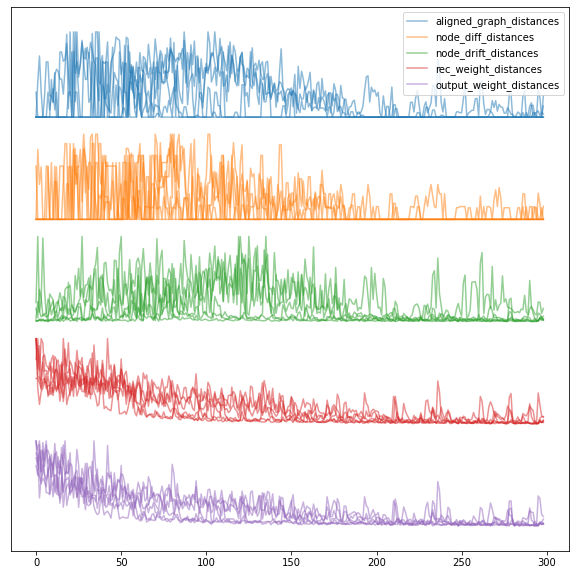

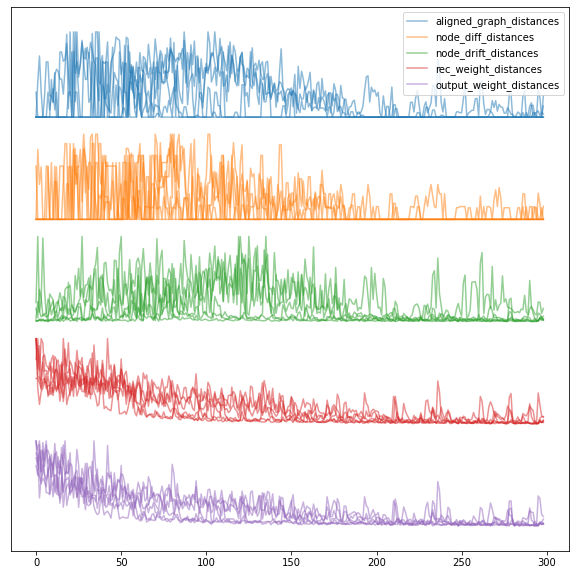

In [6]:
signal_dicts_list = [v for v in signal_dicts.values()]
#signal_dicts_list = [signal_dicts[k] for k in signal_dicts.keys() if ('0,01' in k and '32' in k)]
plot_multiple_signals(signal_dicts_list, key_restriction=None, alpha=0.5)

In [4]:
indices, checkpoints = unpack_analysis_results('/scratch/oem214/learning-dynamics/results/analyze_RFLO_5dense_seed=0/')

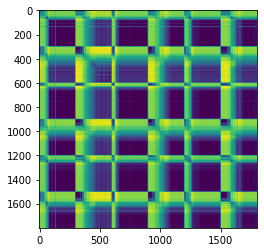

In [4]:
M = result['aligned_graph_distances']
M = M + M.T
fig = plt.figure()
plt.imshow(M)

In [ ]:
plt.figure()
plt.imshow(result['calculation_check'])

In [ ]:
i_1 = 4900
i_2 = 4905

checkpoint_1 = checkpoints['checkpoint_{}'.format(i_1)]
checkpoint_2 = checkpoints['checkpoint_{}'.format(i_2)]

print(M[indices.index(i_1), indices.index(i_2)])

align_checkpoints_based_on_output(checkpoint_2, checkpoint_1, n_inputs=6)
plot_input_dependent_topology(checkpoint_1)
plot_input_dependent_topology(checkpoint_2)

In [ ]:
plt.hist(np.log10(M + 0.0001).flatten(), bins=100)

In [ ]:
figs_path = 'figs/geometry/'
for dist in ['PC1_distances', 'PC2_distances', 'PC3_distances']:
    M = result[dist]
    M = M + M.T
    fig = plt.figure()
    #plt.imshow(np.log10(M + 0.001))
    plt.imshow(M)
    plt.colorbar()
    
    file_name = (dist+'_mat.pdf').replace('_', '-')
    fig.savefig(os.path.join(figs_path, file_name), dpi=300, format='pdf')
    
    colors = ['C0', 'C1'] * 20
    fig = plot_3d_MDS_from_distance_matrix(M, np.array(result['job_indices']), alpha=0.2, colors=colors, return_fig=True)
    file_name = (dist+'_mds.pdf').replace('_', '-')
    fig.savefig(os.path.join(figs_path, file_name), dpi=300, format='pdf')

In [ ]:
C = np.random.normal(0, 1, (1000, 3))
W1 = np.random.normal(0, 1, (3, 100))
W2 = np.random.normal(0, 1, (3, 100))
A = C.dot(W1)
B = C.dot(W2)

cca = CCA(n_components=3)
cca.fit(A, B)
cca.score(A, B)

<IPython.core.display.Javascript object>


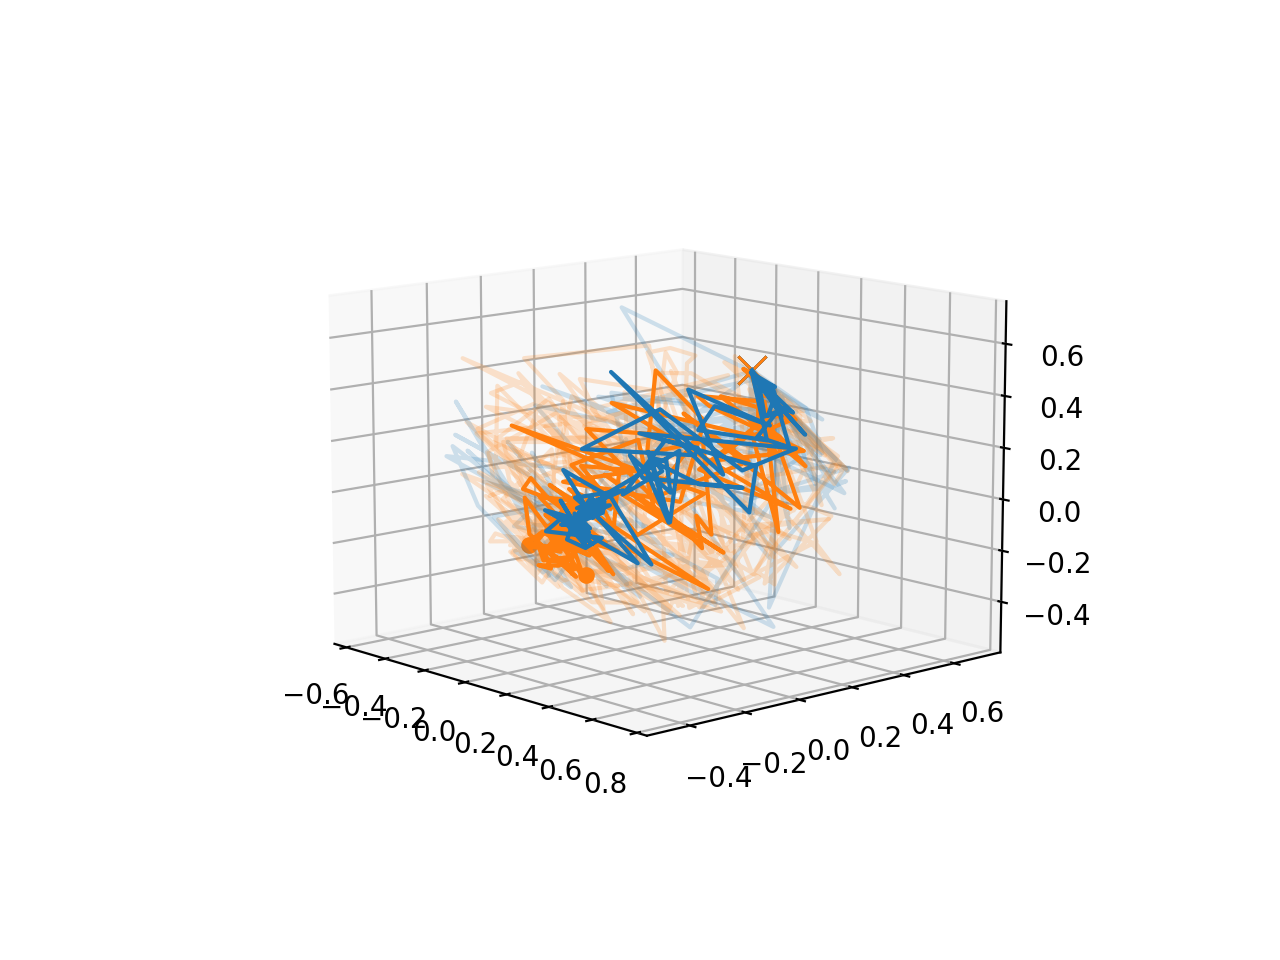

In [11]:
%matplotlib notebook
colors = ['C0', 'C1'] * 3
plot_3d_MDS_from_distance_matrix(M, np.array(result['job_indices']), alpha=0.2, colors=colors)

In [ ]:
colors = ['C0'] * 1
plot_3d_tSNE_from_distance_matrix(relu.f(M[:2000,:2000]), np.array(result['job_indices'][:2000]), alpha=0.2, colors=colors)

In [ ]:
%matplotlib notebook
colors = ['C0', 'C1'] * 5
fig = plot_3d_MDS_from_distance_matrix(np.abs(np.log10(M+0.001)), np.array(result['job_indices']),
                                       alpha=0.2, colors=colors,
                                       return_fig=True)

In [ ]:
figs_path = 'figs/geometry/'
file_name = ('tanhrelu_svcca'+'_mds.pdf').replace('_', '-')
fig.savefig(os.path.join(figs_path, file_name), dpi=300, format='pdf')

In [ ]:
result['job_indices']

In [9]:
saved_run_root_name = root_name
saved_runs_dir = 'saved_runs/'
analysis_job_names = ['analyze_' + sr for sr in os.listdir(saved_runs_dir)
                      if saved_run_root_name in sr]
analysis_job_names = sorted(analysis_job_names)

In [10]:
analysis_job_names

['analyze_new_align_alg_seed=0_learn_alg=DNI',
 'analyze_new_align_alg_seed=0_learn_alg=RFLO',
 'analyze_new_align_alg_seed=1_learn_alg=DNI',
 'analyze_new_align_alg_seed=1_learn_alg=RFLO',
 'analyze_new_align_alg_seed=2_learn_alg=DNI',
 'analyze_new_align_alg_seed=2_learn_alg=RFLO']

In [ ]:
plt.figure()
plt.hist(np.log10(M.flatten()+0.0001), bins=100)

In [ ]:
signals = unpack_compare_result('cross_compare_tanhrelu_svcca', checkpoint_stats={'test_loss': get_checkpoint_loss})

In [ ]:
!ls ../results/compare_tanhrelu*